**I**  have  provided  a  dataset  which  has  a  number  of  features  and  a  single  target (column called ``target'').  Your  task  is  to  use  neural  networks  to address  this  regression problem.

Import the dataset using Pandas as follows:



```
pandas.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa")
```

## Importing modules

In [89]:
import pandas
import numpy as np
np.random.seed(1) 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load Data

In [90]:
df=pd.read_csv("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa") # loading data
dataset = df.values

## Reading data 

In [91]:
df.head() # reading the first 5 data

,var1,var2,var3,var4,var5,var6,var7,var8,target
0,1080.0,0.0,0.0,324.0,5.0,2080.0,1352.0,56,79.99
1,1080.0,0.0,0.0,324.0,5.0,2110.0,1352.0,56,61.89
2,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,540,40.27
3,665.0,285.0,0.0,456.0,0.0,1864.0,1188.0,730,41.05
4,397.2,264.8,0.0,384.0,0.0,1956.8,1651.0,720,44.30


In [92]:
df.describe() # checking the description of data 

,var1,var2,var3,var4,var5,var6,var7,var8,target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,562.331262,147.790971,108.374272,363.132718,12.406223,1945.837184,1547.157767,91.324272,35.817961
std,209.014283,172.558207,127.992939,42.711134,11.946983,155.507636,160.350855,126.339823,16.705742
min,204.000000,0.000000,0.000000,243.500000,0.000000,1602.000000,1188.000000,2.000000,2.330000
25%,384.750000,0.000000,0.000000,329.800000,0.000000,1864.000000,1461.900000,14.000000,23.710000
50%,545.800000,44.000000,0.000000,370.000000,12.700000,1936.000000,1559.020000,56.000000,34.445000
75%,700.000000,285.900000,236.540000,384.000000,20.320000,2058.800000,1648.000000,112.000000,46.135000
max,1080.000000,718.800000,400.200000,494.000000,64.400000,2290.000000,1985.200000,730.000000,82.600000


## View All data

In [93]:
dataset

array([[1080.  ,    0.  ,    0.  , ..., 1352.  ,   56.  ,   79.99],
       [1080.  ,    0.  ,    0.  , ..., 1352.  ,   56.  ,   61.89],
       [ 665.  ,  285.  ,    0.  , ..., 1188.  ,  540.  ,   40.27],
       ...,
       [ 297.  ,  278.8 ,  217.2 , ..., 1560.  ,   56.  ,   23.7 ],
       [ 318.2 ,  373.4 ,    0.  , ..., 1577.8 ,   56.  ,   32.77],
       [ 521.8 ,  201.  ,  156.6 , ..., 1523.  ,   56.  ,   32.4 ]])

## Standaring data

In [94]:
scaled_data = StandardScaler().fit_transform(dataset)

## Checking data shape

In [95]:
df.shape

(1030, 9)

## length of data

In [96]:
len(df) # length of data

1030

## Create X and y variables (features and target)

In [97]:
X=scaled_data[:,0:8] # splting into features
Y=scaled_data[:,8:9] # splting into target

## Checking data

In [98]:
X

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [99]:
Y

array([[ 2.64540763],
       [ 1.56142148],
       [ 0.26662698],
       ...,
       [-0.72572939],
       [-0.18253855],
       [-0.20469738]])

## Check the shapes of the data

In [100]:
X.shape

(1030, 8)

In [101]:
Y.shape

(1030, 1)

## Split the data into training and test data

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1) # splting into train and test data

## Create model

In [103]:
# define the model
def baseline():
    # create model
    model = Sequential()   
    # add one fully connected layer
    model.add(Dense(units = 20, input_dim=8, activation='relu'))
    model.add(Dense(10, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(units=1, activation='linear'))    
    # Compile model
    model.compile(loss='mae', optimizer='adam',metrics=[metrics.mae])
    
    return model

##Initialise the model

In [104]:
model = baseline()

## Determine the number of trainable parameters

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                180       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [106]:
history = model.fit(x_train, y_train, epochs=24, batch_size=3, verbose=1)

Epoch 1/24
275/275 [==============================] - 1s 2ms/step - loss: 0.8004 - mean_absolute_error: 0.8004
Epoch 2/24
275/275 [==============================] - 0s 2ms/step - loss: 0.5710 - mean_absolute_error: 0.5710
Epoch 3/24
275/275 [==============================] - 0s 2ms/step - loss: 0.4918 - mean_absolute_error: 0.4918
Epoch 4/24
275/275 [==============================] - 0s 2ms/step - loss: 0.4326 - mean_absolute_error: 0.4326
Epoch 5/24
275/275 [==============================] - 0s 2ms/step - loss: 0.3955 - mean_absolute_error: 0.3955
Epoch 6/24
275/275 [==============================] - 0s 2ms/step - loss: 0.3674 - mean_absolute_error: 0.3674
Epoch 7/24
275/275 [==============================] - 0s 2ms/step - loss: 0.3464 - mean_absolute_error: 0.3464
Epoch 8/24
275/275 [==============================] - 0s 2ms/step - loss: 0.3249 - mean_absolute_error: 0.3249
Epoch 9/24
275/275 [==============================] - 0s 2ms/step - loss: 0.3138 - mean_absolute_error: 0.3138
E

## Predict on the test data

In [107]:
prediction = model.predict(x_test)

## Compute the mean squared error

In [108]:
mean_squared_error(y_test, prediction)

0.19031417417782653

In [109]:
mean_absolute_error(y_test,prediction)

0.3065977723702273

## Plot

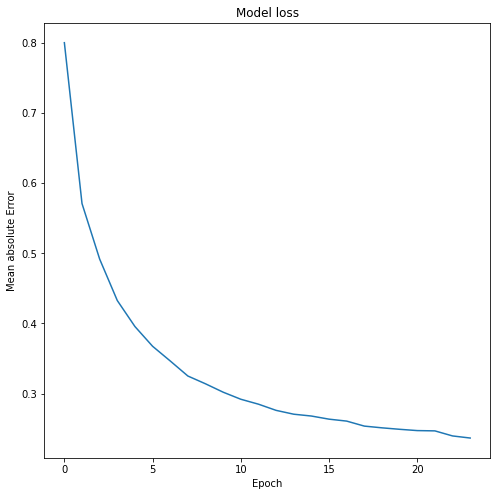

In [110]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_absolute_error'])
plt.title('Model loss')
plt.ylabel('Mean absolute Error')
plt.xlabel('Epoch')
plt.show()